<a href="https://colab.research.google.com/github/Miguel9671/DataScience-III/blob/main/Ejercicio_Final_Miguel_Canales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


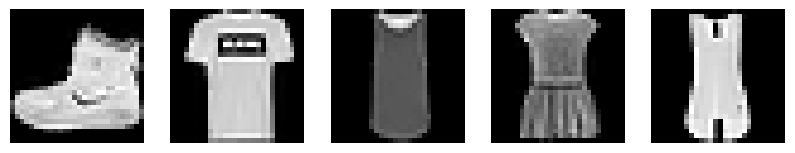

In [68]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

Capas a usar.

In [69]:
#Dense(10, activation='softmax')
#Dense(256, activation='relu'),
#Dropout(0.2),
#Dropout(0.2),
#Dense(128, activation='relu'),
#Flatten(input_shape=(28, 28)),
#Dense(512, activation='relu'),


In [70]:
# Crear el modelo secuencial
model = Sequential()
# Aplanar las imágenes de entrada (28x28) para convertirlas en un vector de 784 valores
model.add(Flatten(input_shape=(28, 28)))

# Capa densa con 512 unidades y activación ReLU
model.add(Dense(512, activation='relu'))

# Capa de Dropout con una tasa de 0.2
model.add(Dropout(0.2))

# Capa densa con 128 unidades y activación ReLU
model.add(Dense(128, activation='relu'))

# Otra capa de Dropout con una tasa de 0.2
model.add(Dropout(0.2))

# Capa densa con 10 unidades para las 10 clases, y activación softmax para clasificación multicategoría
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Resumen del modelo
model.summary()

# Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7640 - loss: 0.6622 - val_accuracy: 0.8475 - val_loss: 0.4138
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8468 - loss: 0.4087 - val_accuracy: 0.8591 - val_loss: 0.3881
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8625 - loss: 0.3752 - val_accuracy: 0.8688 - val_loss: 0.3655
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8719 - loss: 0.3476 - val_accuracy: 0.8692 - val_loss: 0.3662
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8809 - loss: 0.3274 - val_accuracy: 0.8706 - val_loss: 0.3581


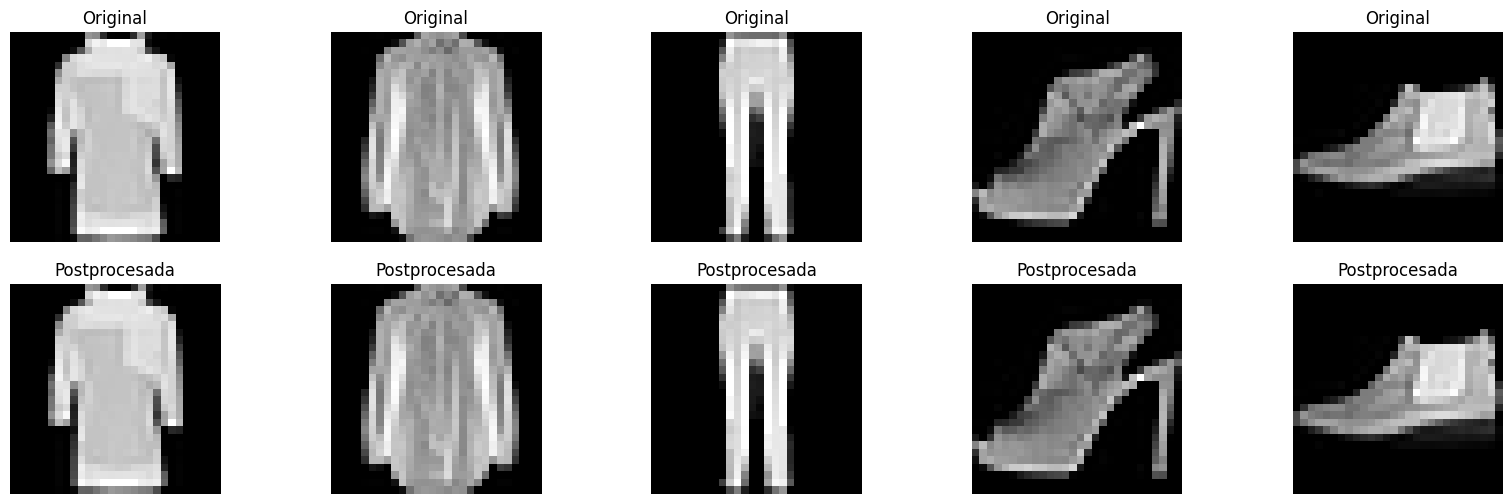

In [73]:
# Mostrar algunas imágenes originales y postprocesadas del conjunto de prueba
fig, axes = plt.subplots(2, 5, figsize=(20, 6))

# Seleccionamos 5 índices aleatorios del conjunto de prueba
random_indices = np.random.choice(len(x_test), 5, replace=False)

for i, idx in enumerate(random_indices):
    # Mostrar imagen original
    axes[0, i].imshow(x_test[idx], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Mostrar imagen postprocesada
    axes[1, i].imshow(x_test[idx], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Postprocesada')

In [ ]:
#Si se ejecuta de nuevo la muestra de imagenes, esta tomara distintas imagenes cada vez que se ejecute.

In [72]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.
